In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
raw_pokemon = pd.read_csv('pokemon.csv')

In [3]:
df_pokemon = raw_pokemon.copy()

In [4]:
raw_pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   number      1072 non-null   int64 
 1   name        1072 non-null   object
 2   type1       1072 non-null   object
 3   type2       574 non-null    object
 4   total       1072 non-null   int64 
 5   hp          1072 non-null   int64 
 6   attack      1072 non-null   int64 
 7   defense     1072 non-null   int64 
 8   sp_attack   1072 non-null   int64 
 9   sp_defense  1072 non-null   int64 
 10  speed       1072 non-null   int64 
 11  generation  1072 non-null   int64 
 12  legendary   1072 non-null   bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 101.7+ KB


## Filtrado



In [5]:
first_type = raw_pokemon.drop('type2',axis=1).rename(columns={'type1':'type'})

In [6]:
second_type = raw_pokemon[pd.isnull(raw_pokemon['type2'])==False].drop('type1',axis=1).rename(columns={'type2':'type'})

In [7]:
one_type_table = pd.concat([first_type,second_type],ignore_index=True).sort_values(by=['number'],ignore_index=True)

In [8]:
sin_gigantamax = one_type_table[~ (one_type_table['name'].str[:len('Gigantamax')].str.contains('Gigantamax'))]

In [9]:
sin_megaevo = sin_gigantamax[~ (sin_gigantamax['name'].str[:len('Mega ')].str.contains('Mega '))]

In [10]:
sin_primal = sin_megaevo[~ (sin_megaevo['name'].str[:len('Primal ')].str.contains('Primal '))]

In [11]:
sin_eternamax_eternatus = sin_primal[sin_megaevo['name']!='Eternamax Eternatus']

/tmp/ipykernel_9188/4169412350.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sin_eternamax_eternatus = sin_primal[sin_megaevo['name']!='Eternamax Eternatus']


In [12]:
df_filtrado = sin_eternamax_eternatus.copy()

En este filtrado duplicaron los registros por cada uno de los tipos y se eliminaron transformaciones temporales de los pokemons como podrian ser los gigantamax, megas evoluciones o forma primigenias 

In [13]:
df_filtrado.loc[df_filtrado['type'] == 'Graass', 'type'] = 'Grass'

Habia un error en el nombre del tipo de un pokemon y se corrigio

## Inicio analisis


In [14]:
colores_por_tipo = {
    'Bug': 'green',
    'Dark': 'black',
    'Dragon': 'blue',
    'Electric': 'yellow',
    'Fairy': 'pink',
    'Fighting': 'brown',
    'Fire': 'red',
    'Flying': 'cyan',
    'Ghost': 'purple',
    'Grass': 'lime',
    'Ground': 'orange',
    'Ice': 'lightblue',
    'Normal': 'gray',
    'Poison': 'darkviolet',
    'Psychic': 'magenta',
    'Rock': 'saddlebrown',
    'Steel': 'darkgray',
    'Water': 'deepskyblue'
}

In [15]:
colores = lambda lista : [colores_por_tipo[i] for i in lista]

Funcion para darles colores definidos a cada tipo a todas las graficas

In [16]:
types = df_filtrado.groupby('type').size().sort_values(ascending=False)

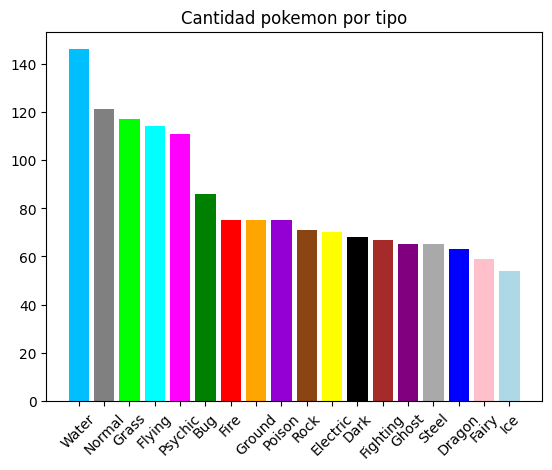

In [17]:
plt.bar(types.index,types,color=colores(types.index))
plt.title('Cantidad pokemon por tipo')
plt.xticks(rotation=45) 
plt.show()

El tipo mas comun de pokemon son los agua debido a la inmensidad de los mares.

![agua](https://pm1.aminoapps.com/6114/aa4650604058c797084881ed3b8cf6f0b6702a8b_00.jpg)

In [18]:
generation	= (df_filtrado.groupby('generation').size())[1:]

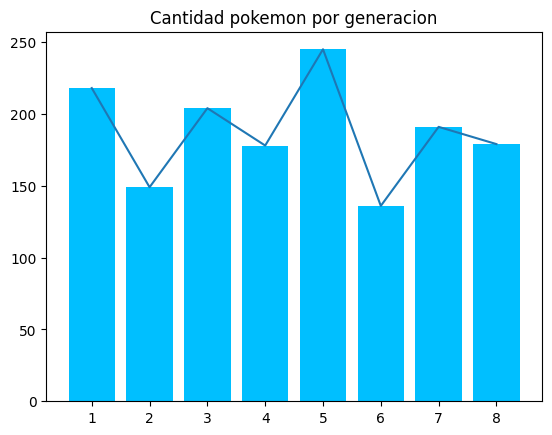

In [19]:
plt.bar([str(i) for i in generation.index],generation,color='deepskyblue')
plt.plot([str(i) for i in generation.index],generation)
plt.title('Cantidad pokemon por generacion')
plt.show()

En esta grafica se puede visualizar la cantidad de pokemon por generacion y el cambio en el transcurir de estas. Siendo la que tiene menos pokemon la sexta generacion y la que mas tiene la quinta generacion.

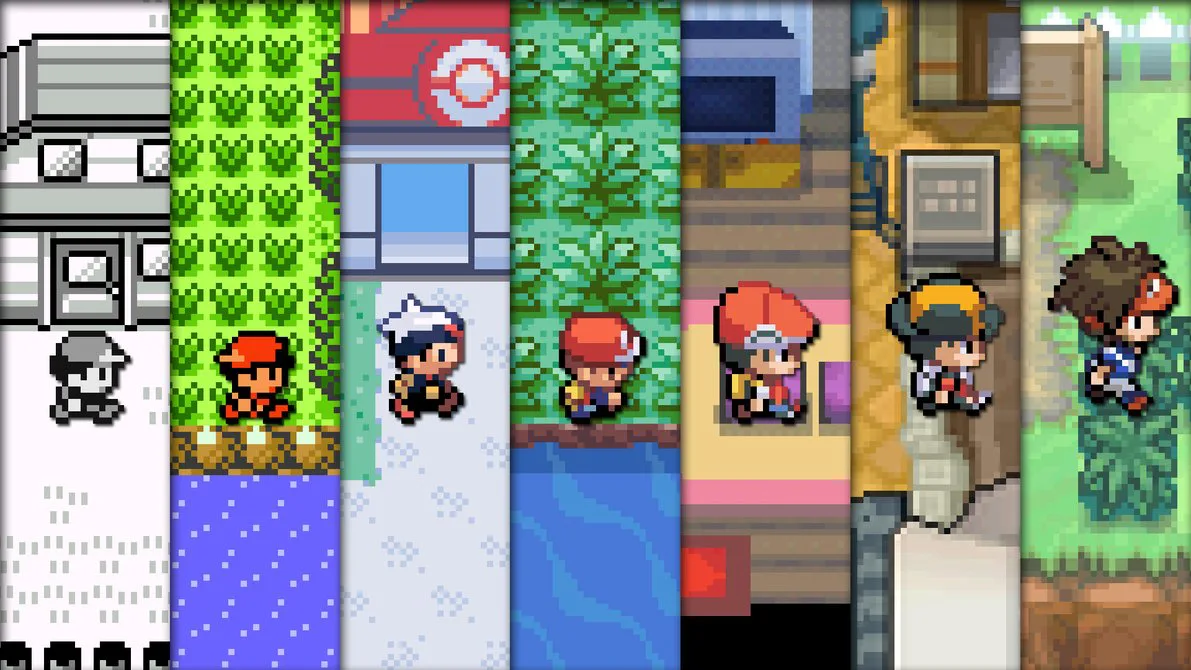

In [20]:
pseudo_legendary = df_filtrado[(df_filtrado['total'] == 600) & (df_filtrado['legendary'] == False)].groupby('type').size()


Los pseudo legendary son aquellos pokemon no legendarios que la suma de sus estadisticas son exactamente 600, teniendo siempre 3 etapas evolutivas y una recoleccion de experiencia lenta. Estos pokemon son normalmente los mas fuertes no legendarios de cada region, normalmente no viene mas de 2 por generacion.

![Legendarios](https://static1.thegamerimages.com/wordpress/wp-content/uploads/2019/07/pseudo-legendary-feature.jpg)

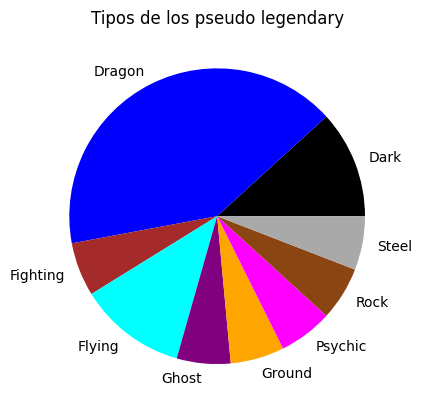

In [21]:
plt.pie(pseudo_legendary,labels=pseudo_legendary.index,colors=colores(pseudo_legendary.index))
plt.title('Tipos de los pseudo legendary')
plt.show()

En esta grafica se evidencia que la mayoria de pseudo legendary son tipo dragon, posiblemente al mistisismo que enrolla al tipo dragon como raros y poderosos.

In [22]:
legendarys = df_filtrado[df_filtrado['legendary'] == True].groupby('type').size()

Los pokemones legendarios son pokemons extremadamente raros y normalmente poderosos los cuales normalmente vienen de la mitologia o leyendas del mundo pokemons siendo creadores, heroes o maldiciones del mundo pokemon.

![Legendarios](https://www.latercera.com/resizer/URfpTuSO3QnZFnrx5TdHT4nCBA4=/900x600/smart/arc-anglerfish-arc2-prod-copesa.s3.amazonaws.com/public/JZYFMMWOUBG7FO2SXILEI25MTM.png)


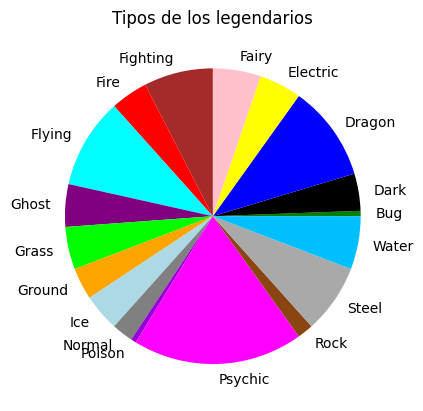

In [23]:
plt.pie(legendarys,labels=legendarys.index,colors=colores(legendarys.index))
plt.title('Tipos de los legendarios')
plt.show()

La mayoria de los pokemon legendarios son tipo psychic debido que es un tipo relacionado a los mitico y lo que no es de este mundo y a que en la primera generacion este tipo fue creador para ser el mas fuerte de todos asi que por motivos de diseno hicieron a muchos de los legendarios sean de este tipo

![mewtwo](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRIdLthn8T72mkehN7Oa9f0CgBP6XzFER1Q5Z5ahT8U7g&s)

Mewtwo, el primer legendario tipo pyshic y el mas poderoso de su generacion 


In [24]:
hp_bytype = df_filtrado.groupby('type')['hp'].median().sort_values(ascending=False)

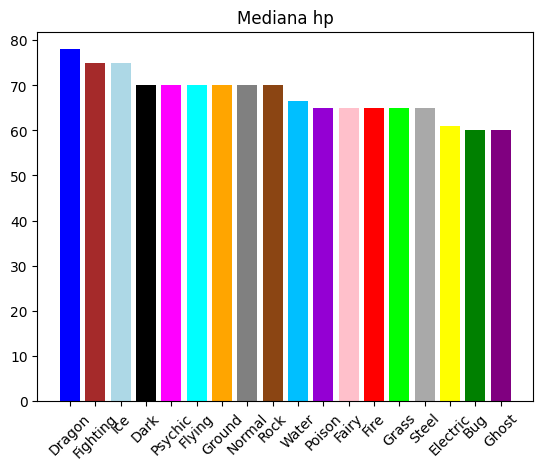

In [25]:
plt.bar(hp_bytype.index,hp_bytype,color=colores(hp_bytype.index))
plt.title('Mediana hp')
plt.xticks(rotation=45) 
plt.show()

In [26]:
attack_bytype = df_filtrado.groupby('type')['attack'].median().sort_values(ascending=False)

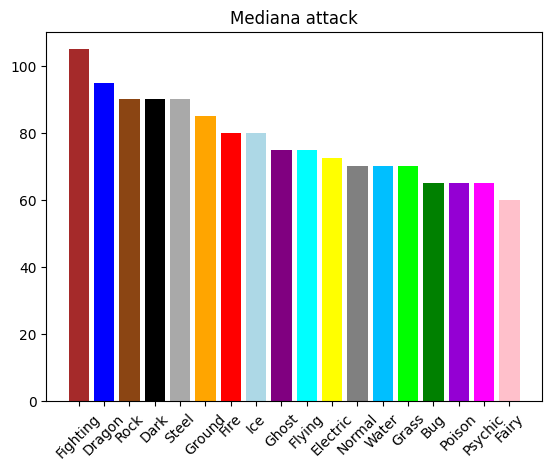

In [27]:
plt.bar(attack_bytype.index,attack_bytype,color=colores(attack_bytype.index))
plt.title('Mediana attack')
plt.xticks(rotation=45) 
plt.show()

En la grafica se puede notar que el tipo con mayor attack es el tipo fighting, esto podria ser debido a que el tipo de basa mayormente en los deporte de contacto.
Los tipos con menos attack son el tipo psychic y fairy, esto podria deberse a que la idea de estos tipos son los poderes especiales, para los fairy poderes magicos y para los psychic poderes psiquicos.

In [28]:
defense_bytype = df_filtrado.groupby('type')['defense'].median().sort_values(ascending=False)

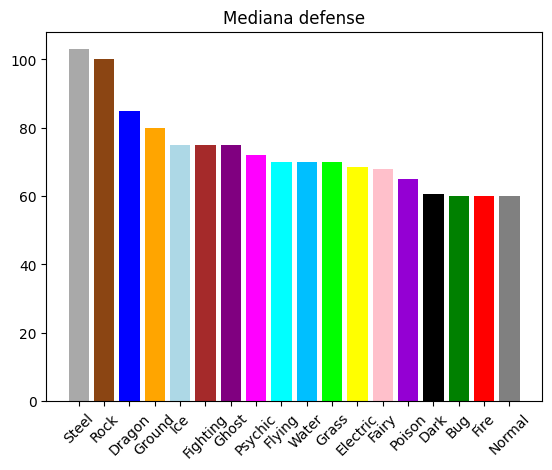

In [29]:
plt.bar(defense_bytype.index,defense_bytype,color=colores(defense_bytype.index))
plt.title('Mediana defense')
plt.xticks(rotation=45) 
plt.show()

En la grafica se puede evidenciar que los tipos steel and rock son los que tienen mas defense ya que el concepto de estos tipos son de materiales duros y resistentes.

In [30]:
sp_attack_bytype = df_filtrado.groupby('type')['sp_attack'].median().sort_values(ascending=False)

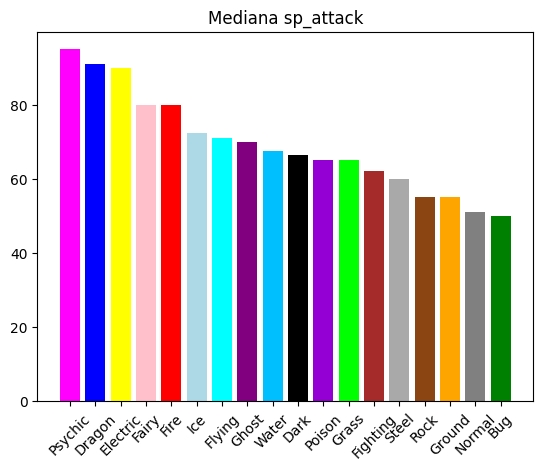

In [31]:
plt.bar(sp_attack_bytype.index,sp_attack_bytype,color=colores(sp_attack_bytype.index))
plt.title('Mediana sp_attack')
plt.xticks(rotation=45) 
plt.show()

En la grafica se puede reconocer que los tipo psychic son los que tienen mas sp_attack debido a que la mayoria de ellos atacan con la mente.

In [32]:
sp_defense_bytype = df_filtrado.groupby('type')['sp_defense'].median().sort_values(ascending=False)

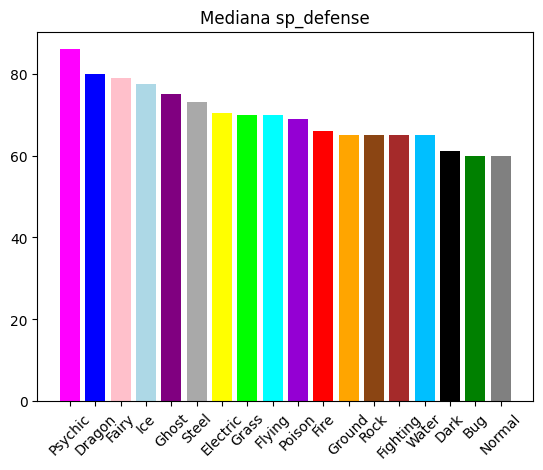

In [33]:
plt.bar(sp_defense_bytype.index,sp_defense_bytype,color=colores(sp_defense_bytype.index))
plt.title('Mediana sp_defense')
plt.xticks(rotation=45) 
plt.show()

En la grafica se puede reconocer que los tipo psychic son los que tienen mas sp_defense debido a que su gran poder mental los puede proteger de ataque no tangentes.

In [34]:
speed_bytype = df_filtrado.groupby('type')['speed'].median().sort_values(ascending=False)

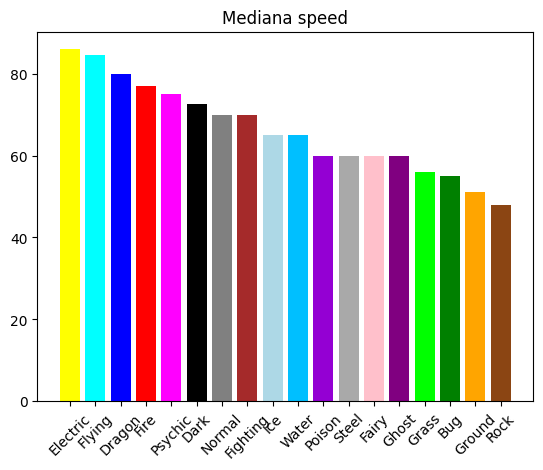

In [35]:
plt.bar(speed_bytype.index,speed_bytype,color=colores(speed_bytype.index))
plt.title('Mediana speed')
plt.xticks(rotation=45) 
plt.show()

En la grafica se puede reconocer que los tipo electric son los que tienen mas speed debido a que la mayoria tiene la velocidad del rayo lo cual los hace rapidos.

In [36]:
df_filtrado.head()

,number,name,type,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Poison,318,45,49,49,65,65,45,1,False
1,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
2,2,Ivysaur,Poison,405,60,62,63,80,80,60,1,False
3,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False
6,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False
